In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [155]:
df = pd.read_csv('World_Happiness_Report.csv', skiprows=1)

for index, row in df.iterrows():
    print(row)

Country Name                         Afghanistan
Regional Indicator                    South Asia
Year                                        2008
Life Ladder                              3.72359
Log GDP Per Capita                      7.350416
Social Support                          0.450662
Healthy Life Expectancy At Birth            50.5
Freedom To Make Life Choices            0.718114
Generosity                              0.167652
Perceptions Of Corruption               0.881686
Positive Affect                         0.414297
Negative Affect                         0.258195
Confidence In National Government       0.612072
Name: 0, dtype: object
Country Name                         Afghanistan
Regional Indicator                    South Asia
Year                                        2009
Life Ladder                             4.401778
Log GDP Per Capita                      7.508646
Social Support                          0.552308
Healthy Life Expectancy At Birth       50.7999

Country Name                                      Gabon
Regional Indicator                   Sub-Saharan Africa
Year                                               2019
Life Ladder                                    4.914393
Log GDP Per Capita                             9.580385
Social Support                                 0.763052
Healthy Life Expectancy At Birth              57.599998
Freedom To Make Life Choices                    0.73635
Generosity                                    -0.203893
Perceptions Of Corruption                      0.846254
Positive Affect                                0.638377
Negative Affect                                0.412961
Confidence In National Government              0.354913
Name: 663, dtype: object
Country Name                                      Gabon
Regional Indicator                   Sub-Saharan Africa
Year                                               2020
Life Ladder                                     4.88655
Log GDP Per Capita     

Name: 1154, dtype: object
Country Name                             Luxembourg
Regional Indicator                   Western Europe
Year                                           2009
Life Ladder                                 6.95792
Log GDP Per Capita                        11.628306
Social Support                             0.938559
Healthy Life Expectancy At Birth          70.300003
Freedom To Make Life Choices               0.939102
Generosity                                 0.117262
Perceptions Of Corruption                  0.431607
Positive Affect                             0.71341
Negative Affect                            0.238022
Confidence In National Government          0.824018
Name: 1155, dtype: object
Country Name                             Luxembourg
Regional Indicator                   Western Europe
Year                                           2010
Life Ladder                                7.097252
Log GDP Per Capita                        11.646967
Social Suppo

Name: 1719, dtype: object
Country Name                              Singapore
Regional Indicator                   Southeast Asia
Year                                           2017
Life Ladder                                6.378438
Log GDP Per Capita                        11.464893
Social Support                              0.89735
Healthy Life Expectancy At Birth          73.400002
Freedom To Make Life Choices               0.926128
Generosity                                 0.130431
Perceptions Of Corruption                  0.161791
Positive Affect                            0.749874
Negative Affect                            0.179325
Confidence In National Government          0.926998
Name: 1720, dtype: object
Country Name                              Singapore
Regional Indicator                   Southeast Asia
Year                                           2018
Life Ladder                                6.374564
Log GDP Per Capita                        11.496155
Social Suppo

In [150]:
columns_to_fill = ['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices', 'Perceptions Of Corruption']

for column in columns_to_fill:
    if df[column].isnull().any():
        df_missing = df[df[column].isnull()]
        
        df_clean = df.dropna(subset=[column])
        
        X_train = df_clean[['Year']]
        y_train = df_clean[column]
        
        model = LinearRegression()
        
        model.fit(X_train, y_train)
        
        X_missing = df_missing[['Year']]
        
        y_missing = model.predict(X_missing)
        
        df.loc[df[column].isnull(), column] = y_missing

print(df)


     Country Name  Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
0     Afghanistan          South Asia  2008     3.723590            7.350416   
1     Afghanistan          South Asia  2009     4.401778            7.508646   
2     Afghanistan          South Asia  2010     4.758381            7.613900   
3     Afghanistan          South Asia  2011     3.831719            7.581259   
4     Afghanistan          South Asia  2012     3.782938            7.660506   
...           ...                 ...   ...          ...                 ...   
2194     Zimbabwe  Sub-Saharan Africa  2018     3.616480            7.783066   
2195     Zimbabwe  Sub-Saharan Africa  2019     2.693523            7.697755   
2196     Zimbabwe  Sub-Saharan Africa  2020     3.159802            7.596050   
2197     Zimbabwe  Sub-Saharan Africa  2021     3.154578            7.656878   
2198     Zimbabwe  Sub-Saharan Africa  2022     3.296220            7.670123   

      Social Support  Healthy Life Expe

In [151]:
categorical_columns = ['Regional Indicator']

imputer = SimpleImputer(strategy='most_frequent')

for column in categorical_columns:
    if df[column].isnull().any():
        imputer_column = df[column].values.reshape(-1, 1)
        
        imputed_values = imputer.fit_transform(imputer_column)
        
        df[column] = imputed_values

print(df)


     Country Name  Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
0     Afghanistan          South Asia  2008     3.723590            7.350416   
1     Afghanistan          South Asia  2009     4.401778            7.508646   
2     Afghanistan          South Asia  2010     4.758381            7.613900   
3     Afghanistan          South Asia  2011     3.831719            7.581259   
4     Afghanistan          South Asia  2012     3.782938            7.660506   
...           ...                 ...   ...          ...                 ...   
2194     Zimbabwe  Sub-Saharan Africa  2018     3.616480            7.783066   
2195     Zimbabwe  Sub-Saharan Africa  2019     2.693523            7.697755   
2196     Zimbabwe  Sub-Saharan Africa  2020     3.159802            7.596050   
2197     Zimbabwe  Sub-Saharan Africa  2021     3.154578            7.656878   
2198     Zimbabwe  Sub-Saharan Africa  2022     3.296220            7.670123   

      Social Support  Healthy Life Expe

In [152]:
df.info()
df.isnull().values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       2199 non-null   object 
 1   Regional Indicator                 2199 non-null   object 
 2   Year                               2199 non-null   int64  
 3   Life Ladder                        2199 non-null   float64
 4   Log GDP Per Capita                 2199 non-null   float64
 5   Social Support                     2186 non-null   float64
 6   Healthy Life Expectancy At Birth   2145 non-null   float64
 7   Freedom To Make Life Choices       2199 non-null   float64
 8   Generosity                         2126 non-null   float64
 9   Perceptions Of Corruption          2199 non-null   float64
 10  Positive Affect                    2175 non-null   float64
 11  Negative Affect                    2183 non-null   float

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Country Name                          0
Regional Indicator                    0
Year                                  0
Life Ladder                           0
Log GDP Per Capita                    0
Social Support                       13
Healthy Life Expectancy At Birth     54
Freedom To Make Life Choices          0
Generosity                           73
Perceptions Of Corruption             0
Positive Affect                      24
Negative Affect                      16
Confidence In National Government     0
dtype: int64


<AxesSubplot:>

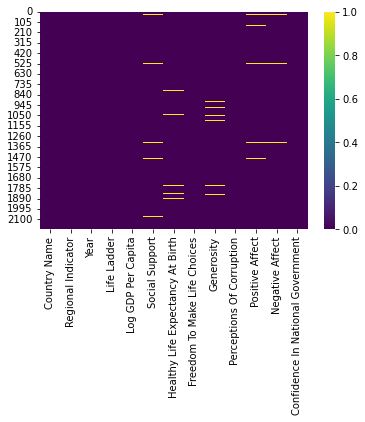

In [153]:
# df.isna().values.sum()
# df.isna().sum().sum()
missing_values = df.isnull()
missing_counts = missing_values.sum()
print(missing_counts)
sns.heatmap(missing_values, cmap='viridis')

In [156]:
df.describe()

,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000,1838.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501,0.483999
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875,0.193071
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737,0.068769
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660,0.332549
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671,0.467140
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894,0.618846
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590,0.993604


In [157]:
df.columns

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

In [80]:
subplot = df[['Life Ladder', 'Confidence In National Government', 'Log GDP Per Capita', 'Freedom To Make Life Choices', 'Perceptions Of Corruption', 'Regional Indicator']]
print(subplot)

KeyError: "None of [Index(['Life Ladder', 'Confidence In National Government',\n       'Log GDP Per Capita', 'Freedom To Make Life Choices',\n       'Perceptions Of Corruption', 'Regional Indicator'],\n      dtype='object')] are in the [columns]"

In [81]:
subplot.columns

Index(['Life Ladder', 'Confidence In National Government',
       'Log GDP Per Capita', 'Freedom To Make Life Choices',
       'Perceptions Of Corruption', 'Regional Indicator'],
      dtype='object')

In [82]:
subplot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Life Ladder                        2199 non-null   float64
 1   Confidence In National Government  1838 non-null   float64
 2   Log GDP Per Capita                 2179 non-null   float64
 3   Freedom To Make Life Choices       2166 non-null   float64
 4   Perceptions Of Corruption          2083 non-null   float64
 5   Regional Indicator                 2087 non-null   object 
dtypes: float64(5), object(1)
memory usage: 103.2+ KB


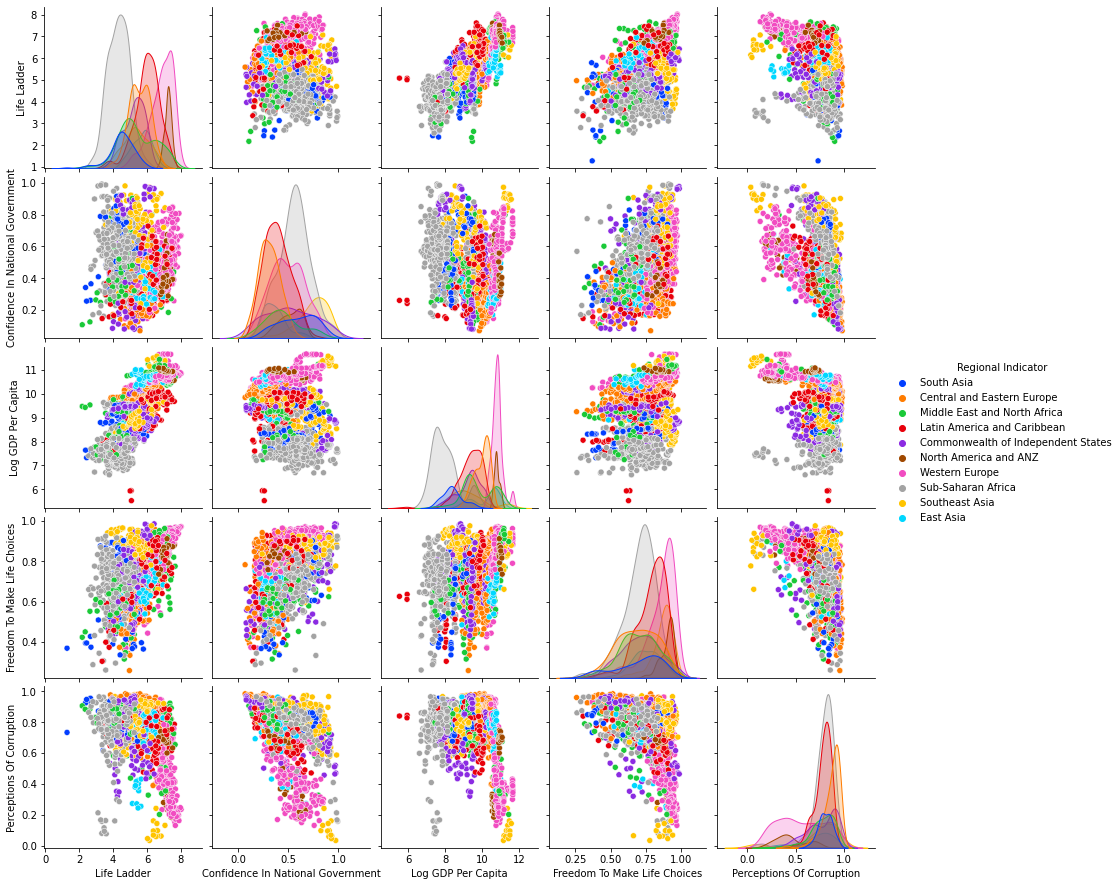

In [83]:
sns.pairplot(subplot, hue='Regional Indicator', palette='bright')
plt.show()

In [85]:
subplot2 = df[['Life Ladder', 'Confidence In National Government', 'Country Name', 'Year', 'Log GDP Per Capita', 'Freedom To Make Life Choices', 'Perceptions Of Corruption', 'Regional Indicator']]
print(subplot2)

KeyError: "None of [Index(['Life Ladder', 'Confidence In National Government', 'Country Name',\n       'Year', 'Log GDP Per Capita', 'Freedom To Make Life Choices',\n       'Perceptions Of Corruption', 'Regional Indicator'],\n      dtype='object')] are in the [columns]"

In [86]:
subplot2.describe()

,Life Ladder,Confidence In National Government,Year,Log GDP Per Capita,Freedom To Make Life Choices,Perceptions Of Corruption
count,2199.000000,1838.000000,2199.000000,2179.000000,2166.000000,2083.000000
mean,5.479226,0.483999,2014.161437,9.389766,0.747858,0.745195
std,1.125529,0.193071,4.718736,1.153387,0.140150,0.185837
min,1.281271,0.068769,2005.000000,5.526723,0.257534,0.035198
25%,4.646750,0.332549,2010.000000,8.499764,0.656528,0.688139
50%,5.432437,0.467140,2014.000000,9.498955,0.769821,0.799654
75%,6.309460,0.618846,2018.000000,10.373216,0.859382,0.868827
max,8.018934,0.993604,2022.000000,11.663788,0.985178,0.983276


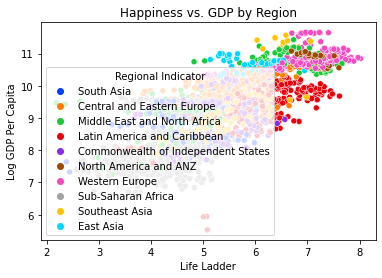

In [87]:
#sns.scatterplot(subplot2, x='Life Ladder', y='Regional Indicator', color='bright')


sns.scatterplot(data=subplot2, x='Life Ladder', y='Log GDP Per Capita', hue='Regional Indicator', palette='bright')
plt.title('Happiness vs. GDP by Region')
plt.xlabel('Life Ladder')
plt.ylabel('Log GDP Per Capita')
plt.show()


plt.show()

In [105]:
import plotly.express as px

fig = px.scatter(df, x="gdpPercap", y="lifeExp", color="continent",
                 size="pop", hover_name="country", log_x=True,
                 animation_frame="year", range_x=[100, 100000],
                 range_y=[20, 90], labels={"gdpPercap": "GDP per capita",
                                          "lifeExp": "Life Expectancy"},
                 title="Gapminder Visualization")
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(
                    label="Play",
                    method="animate",
                    args=[None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True, "mode": "immediate"}],
                ),
                dict(
                    label="Pause",
                    method="animate",
                    args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}],
                ),
            ],
        )
    ],
)
fig['layout']['sliders'][0]['currentvalue']['prefix'] = 'Year: '
fig['layout']['sliders'][0]['currentvalue']['suffix'] = ' '

fig.update_layout(
    sliders=[
        {
            "active": len(df["year"].unique())-1,
            "currentvalue": {
                "visible": True,
                "prefix": "Year: ",
                "xanchor": "right"
            },
            "steps": [
                {
                    "method": "animate",
                    "label": year,
                    "args": [
                        [year],
                        {"frame": {"duration": 300, "redraw": False}, "mode": "immediate"}
                    ],
                }
                for year in df["year"].unique()
            ],
        }
    ],
)

fig.show()


ValueError: 
    Invalid value of type 'numpy.int64' received for the 'label' property of layout.slider.step
        Received value: 1952

    The 'label' property is a string and must be specified as:
      - A string
      - A number that will be converted to a string

In [101]:
# df[year] = .year
# pre_covid = df[df['Year'].isin([2017, 2018, 2019])]
# post_covid = df[df['Year'].isin([2020, 2021, 2022])]
print(df.columns)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')
